# COMP90086 Workshop 3 Solution

(1) Implement a 2D Gaussian blur using two 1D filters. Compare the running time with the 2D Gaussian filtering.

(2) Try varying the kernel size of Gaussian filter and see what changes. e.g., blur with a 5x5 Gaussian vs. a 15x15 Gaussian. 

(3) Take an image and "delete" its magnitude or phase by replacing it with random values. 

(4) implement a Gaussian highpass filter in the frequency domain.

(5) Consider the 7 x 7 image pixel image shown below:

| &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   |
|----------|----------|----------|----------|----------|----------|----------|
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |

Propose a filter that, when convolved with the image above, will give a maximum response in the central pixel of the output and a lower response everywhere else. Note that there are many filter kernels that can achieve this result; for full credit you must propose a kernel that is as small (in x,y dimensions) as possible. Briefly justify your choice of kernel.

## (1) Implement a 2D Gaussian blur using two 1D filters.

In [1]:
import os
import numpy as np
import cv2  
from matplotlib import pyplot as plt

import warnings
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

# Measure execution time
import timeit

Time:  0.005320305999999775
Time:  0.01291216999999989


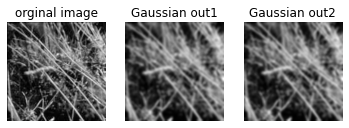

In [2]:
rootpath='./'
img= cv2.imread(os.path.join(rootpath, "img1.png"),cv2.IMREAD_GRAYSCALE) 
 
# Gaussian filter size 15
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kernel=gau_kernel/gau_kernel.sum()

start = timeit.default_timer()
# Applies separable filters to the image.
gau_out1 = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)
# this is equivant to  cv2.GaussianBlur(img,(15,15),5)
stop = timeit.default_timer()
print('Time: ', stop - start) 

gau_kern2d = np.outer(gau_kernel, gau_kernel)
gau_kern2d=gau_kern2d/gau_kern2d.sum()

start = timeit.default_timer()
gau_out2 = cv2.filter2D(img,-1,gau_kern2d)
stop = timeit.default_timer()
print('Time: ', stop - start) 


plt.subplot(1,3,1)
plt.imshow(img,cmap='gray' )
plt.title('orginal image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gau_out1,cmap='gray') 
plt.title('Gaussian out1')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gau_out2,cmap='gray') 
plt.title('Gaussian out2')
plt.axis('off')

plt.show()

## (2) Varying the kernel size

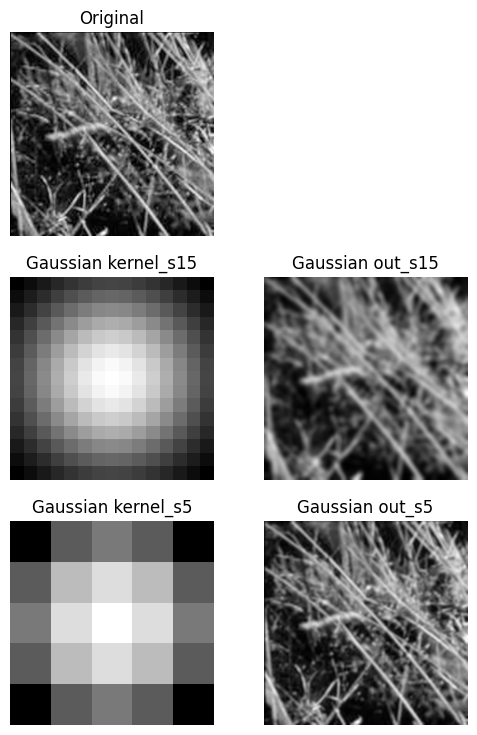

In [3]:
rootpath='./'
img= cv2.imread(os.path.join(rootpath, "img1.png"),cv2.IMREAD_GRAYSCALE) 

# Gaussian filter size 15
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel = cv2.getGaussianKernel(15,5)# 1d gaussian kernel (size, sigma)
gau_kernel=gau_kernel/gau_kernel.sum()
gau_out1 = cv2.sepFilter2D(img,-1,gau_kernel,gau_kernel)

gau_kern2d1 = np.outer(gau_kernel, gau_kernel)
gau_kern2d1=gau_kern2d1/gau_kern2d1.sum()
 
# Gaussian filter size 5
# a 2d Gaussian kernel can be decomposed into 2 1D 
gau_kernel2 = cv2.getGaussianKernel(5,5)# 1d gaussian kernel (size, sigma)
gau_kernel2=gau_kernel2/gau_kernel2.sum()
gau_out2 = cv2.sepFilter2D(img,-1,gau_kernel2,gau_kernel2)

gau_kern2d2= np.outer(gau_kernel2, gau_kernel2)
gau_kern2d2=gau_kern2d2/gau_kern2d2.sum()


plt.subplots(figsize=(6, 9)) 
plt.subplot(3,2,1)

plt.imshow(img,cmap='gray') 
plt.title('Original')
plt.axis('off')

plt.subplot(3,2,3)
plt.imshow(gau_kern2d1,cmap='gray' )
plt.title('Gaussian kernel_s15')
plt.axis('off')

plt.subplot(3,2,4)
plt.imshow(gau_out1,cmap='gray') 
plt.title('Gaussian out_s15')
plt.axis('off')

plt.subplot(3,2,5)
plt.imshow(gau_kern2d2,cmap='gray' )
plt.title('Gaussian kernel_s5')
plt.axis('off')

plt.subplot(3,2,6)
plt.imshow(gau_out2,cmap='gray') 
plt.title('Gaussian out_s5')
plt.axis('off')
plt.show()

## (3) Random phrase/magnitute

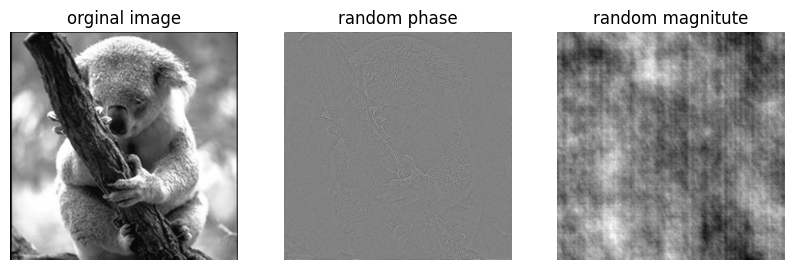

In [4]:
img= cv2.imread(os.path.join(rootpath, "f2.2.png"),cv2.IMREAD_GRAYSCALE) 
 
# Fourier transform
f = np.fft.fft2(img)
f = np.fft.fftshift(f)

# Fourier phase and magnitude
phase = np.angle(f)
magnitude = np.abs(f)

# Make a random noise image to get random magnitude and phase
nz = np.random.rand(img.shape[0],img.shape[1])
f_nz = np.fft.fftshift(np.fft.fft2(nz))
rand_mag = np.abs(f_nz)
rand_phase = np.angle(f_nz)

# Combine image phase with random magnitude
phase_rand_mag = np.multiply(rand_mag, np.exp(1j*phase))

# Combine image magnitude with random phase
mag_rand_phase = np.multiply(magnitude, np.exp(1j*rand_phase))

# Invert Fourier transform to get images
im_phase = np.real(np.fft.ifft2(np.fft.fftshift(phase_rand_mag)))
im_magnitude = np.real(np.fft.ifft2(np.fft.fftshift(mag_rand_phase)))


plt.subplots(figsize=(10, 10)) 

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('orginal image')
plt.axis('off')
 
plt.subplot(1,3,2)
plt.imshow(im_phase ,cmap='gray')  
plt.title('random phase')
plt.axis('off')
 
plt.subplot(1,3,3)
plt.imshow(im_magnitude ,cmap='gray')  
plt.title('random magnitute')
plt.axis('off')
plt.show()

## (4) Gaussian highpass filter in the frequency domain.

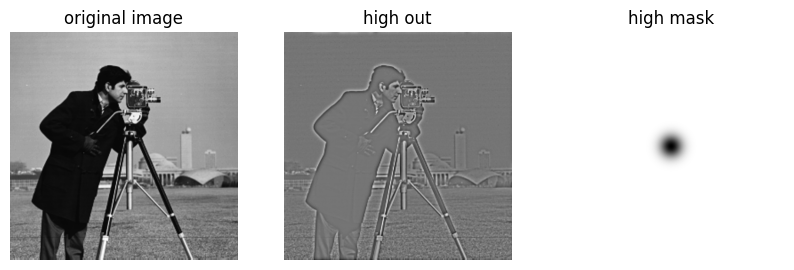

In [5]:
# High and low spatial frequency thresholds
radius_high = 20

rootpath='./'
img= cv2.imread(os.path.join(rootpath, "F1.5.png"),cv2.IMREAD_GRAYSCALE) 
 
# Fourier transform
f = np.fft.fft2(img)
f = np.fft.fftshift(f)
 

def Gauss_HighPass(f,radius_high):  
    
    m = f.shape[0]
    n = f.shape[1]
    mask = np.zeros((m, n))
    
    x0 = np.floor(m/2)
    y0 = np.floor(n/2)
    for i in range(m):
        for j in range(n):
            dis = np.sqrt((i - x0)**2 + (j - y0)**2)
            mask[i][j] = 1-np.exp((-1)*dis**2/2/(radius_high**2))
             
    result = np.multiply(f, mask) 
    return result,mask


f_high_filtered,mask_high = Gauss_HighPass(f,radius_high)
 
# Invert Fourier transform to get the filtered image
img_high = np.real(np.fft.ifft2(np.fft.fftshift(f_high_filtered)))


plt.subplots(figsize=(10, 10))  

plt.subplot(1,3,1)
plt.imshow(img ,cmap='gray')  
plt.title('original image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_high ,cmap='gray')  
plt.title('high out')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(mask_high ,cmap='gray')  
plt.title('high mask')
plt.axis('off')

plt.show()

## (5) Consider the 7 x 7 image pixel image shown below:

| &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   | &nbsp;   |
|----------|----------|----------|----------|----------|----------|----------|
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     1    |     1    |     1    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |
|     0    |     0    |     0    |     0    |     0    |     0    |     0    |

Propose a filter that, when convolved with the image above, will give a maximum response in the central pixel of the output and a lower response everywhere else. Note that there are many filter kernels that can achieve this result; for full credit you must propose a kernel that is as small (in x,y dimensions) as possible. Briefly justify your choice of kernel.

Any 3x3 smoothing/averaging filter will work, e.g.:

|  &nbsp;  |  &nbsp;  |  &nbsp;  |
|----------|----------|----------|
| 1/9      | 1/9      | 1/9      |
| 1/9      | 1/9      | 1/9      |
| 1/9      | 1/9      | 1/9      |

or

|&nbsp;|&nbsp;|&nbsp;|
|---|---|---|
| 0 | 1 | 0 |
| 1 | 2 | 1 |
| 0 | 1 | 0 |

A 3x3 identity filter will also work:

|&nbsp;|&nbsp;|&nbsp;|
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 0 |


No kernel smaller than 3x3 can achieve this result. Kernels larger than 3x3 can also produce a single maximum response but are unnecessarily large.


In [5]:
import numpy as np
import scipy.signal

# Create a 10x10 grid of 0's
image = np.zeros((10, 10))

# Insert a 3x3 grid of 1's in the center
image[4:7, 4:7] = 1

# Define the 3x3 identity filter
identity_filter = np.array([[0, 0, 0],
                            [0, 1, 0],
                            [0, 0, 0]])

# Convolve the image with the identity filter
output = scipy.signal.convolve2d(image, identity_filter, mode='same')

print(output)


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
